In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
%matplotlib inline

In [389]:
import warnings
warnings.filterwarnings('ignore')

In [323]:
pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 100)

In [324]:
data = pd.read_csv("src/data.csv", sep=",")

In [325]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127٫3,1,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,10٫8,1٫4,1٫74,Dropout
1,1,15,1,9254,1,1,160,1,1,3,3,3,142٫5,1,0,0,0,1,0,19,0,0,6,6,6,14,0,0,6,6,6,13٫6666666666667,0,13٫9,-0٫3,0٫79,Graduate
2,1,1,5,9070,1,1,122,1,37,37,9,9,124٫8,1,0,0,0,1,0,19,0,0,6,0,0,0,0,0,6,0,0,0,0,10٫8,1٫4,1٫74,Dropout
3,1,17,2,9773,1,1,122,1,38,37,5,3,119٫6,1,0,0,1,0,0,20,0,0,6,8,6,13٫4285714285714,0,0,6,10,5,12٫4,0,9٫4,-0٫8,-3٫12,Graduate
4,2,39,1,8014,0,1,100,1,37,38,9,9,141٫5,0,0,0,1,0,0,45,0,0,6,9,5,12٫3333333333333,0,0,6,6,6,13,0,13٫9,-0٫3,0٫79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125,1,1,1,5,4,122٫2,0,0,0,1,1,0,19,0,0,6,7,5,13٫6,0,0,6,8,5,12٫6666666666667,0,15٫5,2٫8,-4٫06,Graduate
4420,1,1,2,9773,1,1,120,105,1,1,9,9,119,1,0,1,0,0,0,18,1,0,6,6,6,12,0,0,6,6,2,11,0,11٫1,0٫6,2٫02,Dropout
4421,1,1,1,9500,1,1,154,1,37,37,9,9,149٫5,1,0,0,1,0,1,30,0,0,7,8,7,14٫9125,0,0,8,9,1,13٫5,0,13٫9,-0٫3,0٫79,Dropout
4422,1,1,1,9147,1,1,180,1,37,37,7,4,153٫8,1,0,0,1,0,1,20,0,0,5,5,5,13٫8,0,0,5,6,5,12,0,9٫4,-0٫8,-3٫12,Graduate


In [326]:
# df = data[["Application order", 
#            "Daytime/evening attendance",
#            "Displaced", 
#            "Educational special needs",
#           "Tuition fees up to date",
#           "Scholarship holder",
#           "Curricular units 1st sem (approved)",
#           "Curricular units 1st sem (grade)",
#           "Curricular units 1st sem (without evaluations)",
#           "",
#           "Curricular units 2nd sem (grade)",
#           "Gender",
#           "Target"]]

In [327]:
df = data.drop(columns=['Nacionality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'])

In [328]:
for i in range(len(data)):
    df.loc[i, "Previous qualification (grade)"] = data.loc[i, "Previous qualification (grade)"].replace("٫", ".")
    df.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    df.loc[i, "Curricular units 1st sem (grade)"] = str(data.loc[i, "Curricular units 1st sem (grade)"]).replace("٫", ".")
    df.loc[i, "Curricular units 2nd sem (grade)"] = data.loc[i, "Curricular units 2nd sem (grade)"].replace("٫", ".")
    df.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    


In [329]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,5,1,1,122,127.3,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,Dropout
1,1,15,1,1,1,160,142.5,1,0,0,1,0,19,6,6,14,0,0,6,6,6,13.6666666666667,0,Graduate
2,1,1,5,1,1,122,124.8,1,0,0,1,0,19,6,0,0,0,0,6,0,0,0,0,Dropout
3,1,17,2,1,1,122,119.6,1,0,1,0,0,20,6,6,13.4285714285714,0,0,6,10,5,12.4,0,Graduate
4,2,39,1,0,1,100,141.5,0,0,1,0,0,45,6,5,12.3333333333333,0,0,6,6,6,13,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125,122.2,0,0,1,1,0,19,6,5,13.6,0,0,6,8,5,12.6666666666667,0,Graduate
4420,1,1,2,1,1,120,119,1,1,0,0,0,18,6,6,12,0,0,6,6,2,11,0,Dropout
4421,1,1,1,1,1,154,149.5,1,0,1,0,1,30,7,7,14.9125,0,0,8,9,1,13.5,0,Dropout
4422,1,1,1,1,1,180,153.8,1,0,1,0,1,20,5,5,13.8,0,0,5,6,5,12,0,Graduate


In [330]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

In [331]:
# df = df.drop([137,  214,  273,  337,  423,  568,  653,  712,  769,  828,  904 , 911,  931,
#  1085, 1175, 1195, 1200, 1239, 1317, 1350, 1363, 1525, 1551, 1562, 1658, 1680, 1716,
#  1768, 1803, 1808, 1821, 1832, 1868, 1872, 1880, 1940, 2073, 2183, 2225, 2284, 2285,
#  2343, 2412, 2482, 2574, 2679, 2684, 2740, 2766, 2878, 2879, 2893, 2895, 2901, 2920,
#  2931, 3017, 3147, 3331, 3367, 3383, 3464, 3479, 3551, 3632, 3667, 3703, 3828, 3829,
#  3903, 3977, 4040, 4182])



In [332]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [333]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [334]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_data)
pca_data = pca.fit_transform(scaled_data)

In [335]:
# plt.figure(figsize=(12, 8))
# # plt.scatter(pca_data[:,0], pca_data[:,1], c=y)
# sns.scatterplot(pca_data)

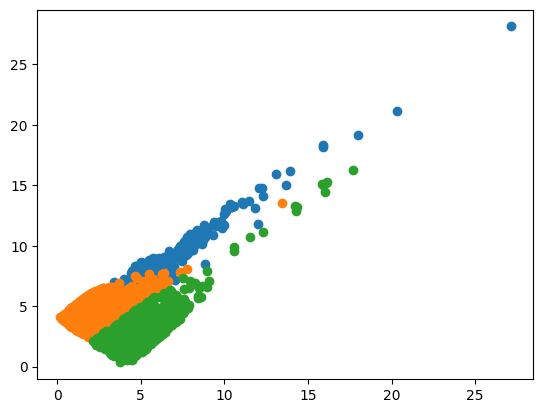

35421.866391907024


In [336]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
label = kmeans.fit_predict(pca_data)
cluster_data = kmeans.fit_transform(pca_data)
u_labels = np.unique(label)

#plotting the results:
# df["cluster_number"] = label
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.show()
print(kmeans.inertia_)


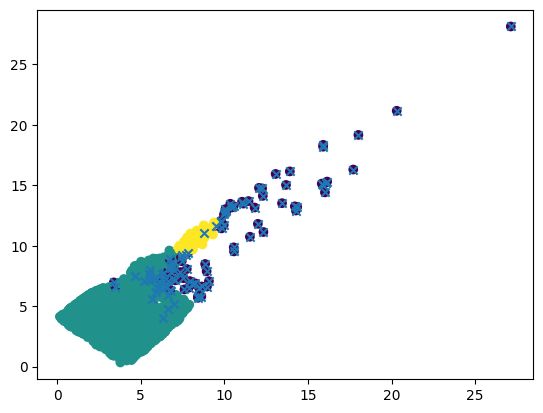

silhouette score: 0.6039272375601717
outliner: [   5   82  180  244  262  277  341  428  518  533  602  640  660  669
  678  684  689  702  724  747  894  919 1100 1190 1210 1215 1254 1348
 1378 1441 1515 1572 1574 1633 1677 1699 1724 1767 1828 1880 1888 1892
 1894 1901 1961 2031 2095 2205 2247 2256 2336 2366 2400 2407 2438 2447
 2451 2476 2492 2502 2511 2639 2680 2711 2798 2863 2870 2873 2915 2929
 2931 2956 2959 2967 2975 2977 3093 3182 3186 3272 3371 3408 3424 3472
 3566 3635 3802 3808 3813 3874 3875 3923 3961 4024 4062 4087 4128 4229
 4250 4261 4313]


In [337]:
dbscan = DBSCAN(eps=0.8, min_samples=12)
dbscan.fit(cluster_data)
dbscan_labels = dbscan.labels_
outliers = np.where(dbscan_labels == -1)[0]
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=dbscan_labels)
plt.scatter(cluster_data[outliers, 0], cluster_data[outliers, 1], marker="x")

plt.show()
print(f"silhouette score: {silhouette_score(cluster_data, dbscan_labels)}")
print(f"outliner: {outliers}")


In [360]:
X = pd.DataFrame(df.iloc[:, :-1])
y = pd.DataFrame(df.iloc[:, -1])

In [350]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

In [351]:
from sklearn.model_selection import cross_val_score

In [352]:
from sklearn.linear_model import LogisticRegression

In [390]:
model = LogisticRegression(random_state=10, C=0.8)
kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
    model.fit(X.loc[train], y.loc[train])
    print(model.score(X.loc[train], y.loc[train]))
    print(model.score(X.loc[test], y.loc[test]))
# cross_val_results = cross_val_score(model, X, y, cv=kf)
# print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
# print(f'Mean Accuracy: {cross_val_results.mean()}')
# model.fit(x_train, y_train)
# print(model.score(x_test, y_test))
# print(model.score(x_train, y_train))

0.7521898841480644
0.7604519774011299
0.7465385702175756
0.7593220338983051
0.7485165300932467
0.7502824858757062
0.7513421870584911
0.7389830508474576
0.7491525423728813
0.7262443438914027


In [296]:
from sklearn.svm import SVC

In [392]:
clf = SVC(C=1000, gamma=10)
kf = KFold(n_splits=10)
for train, test in kf.split(X, y):
    clf.fit(X.loc[train], y.loc[train])
    print(clf.score(X.loc[train], y.loc[train]))
    print(clf.score(X.loc[test], y.loc[test]))
# cross_val_results = cross_val_score(model, X, y
# cross_val_results = cross_val_score(clf, X, y, cv=kf)
# print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
# print(f'Mean Accuracy: {cross_val_results.mean()}')
# clf.fit(x_train, y_train)
# print(clf.score(x_train, y_train))
# print(clf.score(x_test, y_test))

1.0
0.5643340857787811
1.0
0.510158013544018
1.0
0.5778781038374717
1.0
0.4469525959367946
1.0
0.5656108597285068
1.0
0.40271493212669685
1.0
0.5135746606334841
1.0
0.45475113122171945
1.0
0.45701357466063347
1.0
0.5


In [298]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
forest = RandomForestClassifier(n_estimators=10, max_depth=2)
kf = KFold(n_splits=10)
for train, test in kf.split(X, y):
    forest.fit(X.loc[train], y.loc[train])
    print(forest.score(X.loc[train], y.loc[train]))
    print(forest.score(X.loc[test], y.loc[test]))
# forest.fit(x_train, y_train)
# print(forest.score(x_train, y_train))
# print(forest.score(x_test, y_test))

0.7118814368249183
0.7358916478555305
0.7050992213011806
0.6794582392776524
0.7111278573222808
0.7878103837471784
0.7249434815373021
0.6930022573363431
0.7162230035158212
0.7330316742081447
0.7212456052235058
0.6945701357466063
0.7280261175288799
0.7194570135746606
0.7267704671019588
0.7171945701357466
0.7079357106981417
0.7171945701357466
0.7122049221496736
0.7375565610859729


In [300]:
from sklearn.neighbors import KNeighborsClassifier

In [301]:
knn = KNeighborsClassifier(n_neighbors=3)

In [302]:
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.7965517241379311
0.6578645235361653


In [303]:
from sklearn.ensemble import GradientBoostingClassifier

In [304]:
gradientBoosting = GradientBoostingClassifier()
gradientBoosting.fit(x_train, y_train)
print(gradientBoosting.score(x_train, y_train))
print(gradientBoosting.score(x_test, y_test))

0.8192528735632184
0.7703788748564868
